# Task 1

---

## Web scraping and analysis


### Scraping data from Skytrax



In [88]:
# pip install pandas
# pip install beatifulsoup
# 
# !pip install pandas
!pip install beautifulsoup4



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [90]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [91]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | London Heathrow to Male In...
1,Not Verified | Very good flight following an ...
2,Not Verified | An hour's delay due to late ar...
3,✅ Trip Verified | I booked through BA becaus...
4,✅ Trip Verified | British airways lost bags ...


In [92]:
df.to_csv("data/BA_reviews.csv")

In [93]:
# df.head(5)

In [94]:
import re
df = pd.DataFrame(reviews, columns=['Review'])

def clean_review(text):
    # Remove "✅ Trip Verified", "Not Verified" or any other unnecessary prefix
    text = re.sub(r"✅ Trip Verified|Not Verified|Verified|Unverified|||\\n", "", text)
    # Additional cleaning can be done here, such as removing extra spaces, unwanted characters, etc.
    return text.strip()

# Apply the cleaning function to the 'Review' column
df['Cleaned_Review'] = df['Review'].apply(clean_review)

# Print the cleaned reviews
print(df['Cleaned_Review'])

0      |   London Heathrow to Male In new business cl...
1      |  Very good flight following an equally good ...
2      |  An hour's delay due to late arrival of the ...
3      |   I booked through BA because Loganair don’t...
4      |   British airways lost bags in LHR then foun...
                             ...                        
995    |  London to Shanghai. The Concorde room in He...
996    |  I have often flown British Airways and have...
997    |  Good morning. I would like to write a revie...
998    | My flight was cancelled 3 days in a row. Was...
999    |  Hong Kong to Copenhagen via London. The who...
Name: Cleaned_Review, Length: 1000, dtype: object


In [95]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [96]:
# pip install pandas nltk matplotlib wordcloud


In [97]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('vader_lexicon')  # If you plan to use sentiment analysis


In [98]:
def clean_review(text):
    # Remove '✅ Trip Verified' or any similar labels
    text = re.sub(r"✅ Trip Verified|Not Verified|Verified|Unverified|\n", "", text)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation, numbers, and extra spaces
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    return text.strip()

# Apply the cleaning function
df['Cleaned_Review'] = df['Review'].apply(clean_review)

# Tokenization and removing stopwords
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def tokenize_and_clean(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply tokenization and stopword removal
df['Processed_Review'] = df['Cleaned_Review'].apply(tokenize_and_clean)

# Print cleaned reviews
print(df['Processed_Review'])

# Word Frequency Analysis
all_reviews = ' '.join(df['Processed_Review'])
word_tokens = word_tokenize(all_reviews)

# Get word frequency

# word_freq = Counter(word_tokens)

# # Print most common words
# print(word_freq.most_common(10))

# # # Visualization with Wordcloud
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# # Plot the word cloud
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()



0      london heathrow male new business class ba con...
1      good flight following equally good flight rome...
2      hour delay due late arrival incoming aircraft ...
3      booked ba loganair dont representative manches...
4      british airway lost bag lhr found sent cologne...
                             ...                        
995    london shanghai concorde room heathrow termina...
996    often flown british airway considered good air...
997    good morning would like write review british a...
998    flight cancelled day row flying thursday final...
999    hong kong copenhagen via london whole experien...
Name: Processed_Review, Length: 1000, dtype: object


                                    Processed_Review  Sentiment
0  london heathrow male new business class ba con...     0.9846
1  good flight following equally good flight rome...     0.8271
2  hour delay due late arrival incoming aircraft ...     0.8442
3  booked ba loganair dont representative manches...     0.1566
4  british airway lost bag lhr found sent cologne...    -0.5423


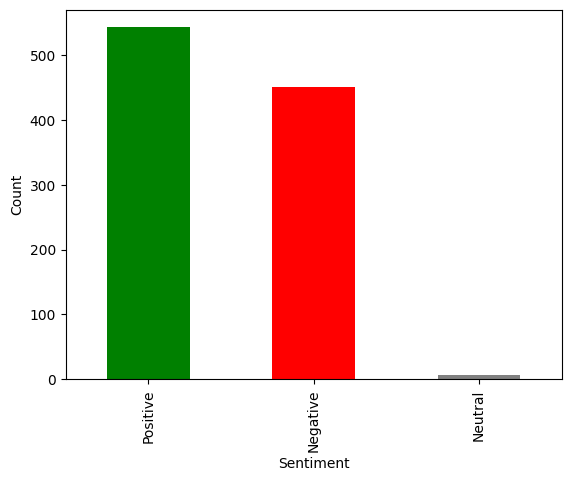

In [100]:
# Optional: Sentiment Analysis
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Processed_Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Print sentiment analysis results
print(df[['Processed_Review', 'Sentiment']].head())

# Example: Positive/Negative Distribution
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Plot sentiment distribution
df['Sentiment_Label'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
# plt.title('Sentiment Distribution')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()